<a href="https://colab.research.google.com/github/NikhilGurrapu/RidgeRegression_step_by_step_m_and_b/blob/main/RidgeRegression_step_by_step_m_and_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [201]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# making regression dataset

In [202]:
X,y = make_regression(n_samples=200, n_features=1, n_informative=1, n_targets=1, noise=50, random_state=42)

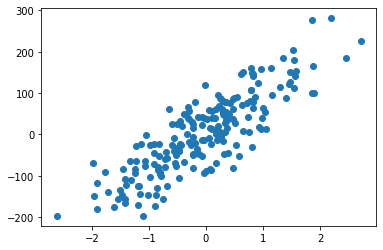

In [203]:
plt.scatter(X,y)

# splitting train test set

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=20,random_state=42)

# Building LinearRegression

In [205]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_,"\n",lr.intercept_)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

[86.52915698] 
 6.4304221869151865


0.7561829865790544

# Building Ridge Regression 
## alpha = 10

In [206]:
rr = Ridge(alpha = 10)
rr.fit(X_train,y_train)
print(rr.coef_,"\n",rr.intercept_)
y_pred = rr.predict(X_test)
r2_score(y_test,y_pred)

[81.23384292] 
 6.428545066956272


0.7610033427240392

# Building Rdige Regression
## alpha = 100

In [207]:
rr1 = Ridge(alpha = 100)
rr1.fit(X_train,y_train)
print(rr1.coef_,"\n",rr1.intercept_)
y_pred = rr1.predict(X_test)
r2_score(y_test,y_pred)

[52.38284491] 
 6.418317763420481


0.6555474976066431

## Ridge Regression with alpha=10 gives better r2_score than LinearRegression and Ridge Regression with alpha=100 tends to under-fit

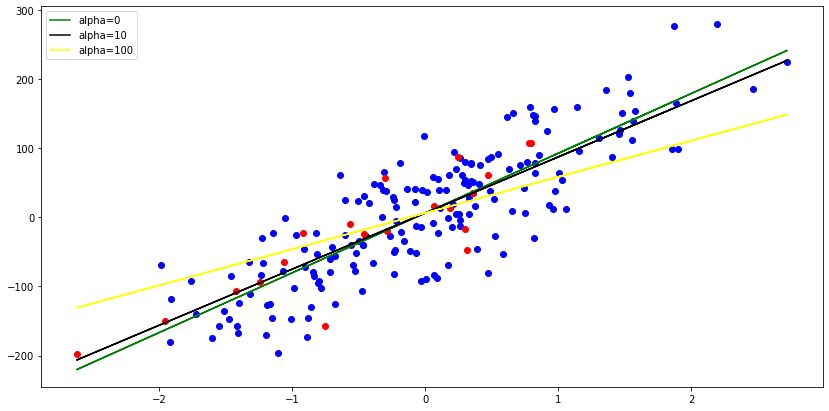

In [208]:
plt.figure(figsize=(14,7))
plt.scatter(X_train,y_train,color='blue')
plt.scatter(X_test,y_test,color='red')
plt.plot(X,lr.predict(X), color='green',label='alpha=0')
plt.plot(X,rr.predict(X), color='black',label='alpha=10')
plt.plot(X,rr1.predict(X), color='yellow',label='alpha=100')
plt.legend()
plt.show()

# Building Own Ridge Regression class

In [209]:
class RidgeRegression:
  def __init__(self,alpha=0.1):
    self.alpha = alpha
    self.m = None 
    self.b = None
  
  def fit(self,X_train,y_train):
    num = 0
    den = 0

    for i in range(X_train.shape[0]):
      num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
      den = den + (X_train[i] - X_train.mean())**2

    self.m = num/(den + self.alpha)
    self.b = y_train.mean() - self.m * X_train.mean()

    print(self.m,"\n",self.b)
  
  def predict(self,X_test):
    return self.m * X_test + self.b

In [210]:
rr = RidgeRegression(alpha=10)

In [211]:
rr.fit(X_train,y_train)

[81.23384292] 
 [6.42854507]


In [212]:
y_pred = rr.predict(X_test)
r2_score(y_test,y_pred)

0.7610033427240392